# ASIGNACIÓN

## Paso 1: Importación de Datos

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df_bitcoin = pd.read_csv('/content/gdrive/MyDrive/BTCUSD_1hr.csv')

## Paso 2: Descripción del Dataframe

In [ ]:
df_bitcoin.describe()

,Unix Timestamp,Open,High,Low,Close,Volume
count,3.946500e+04,39465.000000,39465.000000,39465.000000,39465.000000,39465.000000
mean,6.182322e+11,4817.778638,4844.889457,4788.678433,4817.963371,158.393961
std,7.614885e+11,3925.257801,3954.058698,3893.325248,3925.202322,300.774291
min,1.444309e+09,0.000000,243.600000,0.000000,243.600000,0.000000
25%,1.479827e+09,741.740000,743.000000,740.020000,741.800000,18.164575
50%,1.515344e+09,4142.120000,4165.380000,4118.390000,4142.590000,62.790643
75%,1.550862e+12,7908.480000,7950.000000,7860.750000,7908.480000,175.504078
max,1.586390e+12,19869.860000,19999.000000,19778.120000,19869.860000,8526.751048


## Paso 3: Métodos para determinar si tiene Valores Nulos

In [ ]:
df_bitcoin.isna()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
39460,False,False,False,False,False,False,False,False
39461,False,False,False,False,False,False,False,False
39462,False,False,False,False,False,False,False,False
39463,False,False,False,False,False,False,False,False


In [ ]:
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39465 entries, 0 to 39464
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unix Timestamp  39465 non-null  int64  
 1   Date            39465 non-null  object 
 2   Symbol          39465 non-null  object 
 3   Open            39465 non-null  float64
 4   High            39465 non-null  float64
 5   Low             39465 non-null  float64
 6   Close           39465 non-null  float64
 7   Volume          39465 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.4+ MB


In [ ]:
df_bitcoin.isnull()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
39460,False,False,False,False,False,False,False,False
39461,False,False,False,False,False,False,False,False
39462,False,False,False,False,False,False,False,False
39463,False,False,False,False,False,False,False,False


In [ ]:
#Verificamos la cantidad de valores en 0 de la columna 'Open'
dato_0 = (df_bitcoin[['Open']] == 0).sum()
print(dato_0)

Open    1
dtype: int64


In [ ]:
#Verificamos el dato
df_bitcoin.loc[df_bitcoin['Open']==0]

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
39464,1444309200,2015-10-08 13:00:00,BTCUSD,0.0,245.0,0.0,245.0,0.606654


## Paso 4: Agrupación por meses

In [ ]:
#Convertimos la columna a un formato de fecha
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])

In [ ]:
df_bitcoin.head(10)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7338.23,7338.23,7.788915
1,1586386800000,2020-04-08 23:00:00,BTCUSD,7367.28,7398.92,7348.47,7369.60,66.558293
2,1586383200000,2020-04-08 22:00:00,BTCUSD,7337.19,7390.25,7322.87,7367.28,88.486108
3,1586379600000,2020-04-08 21:00:00,BTCUSD,7327.70,7370.00,7311.33,7337.19,35.551553
4,1586376000000,2020-04-08 20:00:00,BTCUSD,7320.11,7375.72,7313.66,7327.70,153.655811
5,1586372400000,2020-04-08 19:00:00,BTCUSD,7324.32,7346.80,7269.33,7320.11,157.664798
6,1586368800000,2020-04-08 18:00:00,BTCUSD,7314.15,7343.27,7302.00,7324.32,202.914368
7,1586365200000,2020-04-08 17:00:00,BTCUSD,7337.55,7364.49,7303.14,7314.15,91.257907
8,1586361600000,2020-04-08 16:00:00,BTCUSD,7283.45,7349.41,7261.61,7337.55,325.729985
9,1586358000000,2020-04-08 15:00:00,BTCUSD,7269.64,7302.98,7267.73,7283.45,76.415435


In [ ]:
#Añadimos la columna Mes con el metodo strftime, para que lo coloque a través del año y mes

import datetime as dt

df_bitcoin['Month'] = df_bitcoin['Date'].dt.strftime('%Y-%m')
df_bitcoin['Year'] = df_bitcoin['Date'].dt.strftime('%Y')

In [ ]:
df_bitcoin.head(10)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Month,Year
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7338.23,7338.23,7.788915,2020-04,2020
1,1586386800000,2020-04-08 23:00:00,BTCUSD,7367.28,7398.92,7348.47,7369.60,66.558293,2020-04,2020
2,1586383200000,2020-04-08 22:00:00,BTCUSD,7337.19,7390.25,7322.87,7367.28,88.486108,2020-04,2020
3,1586379600000,2020-04-08 21:00:00,BTCUSD,7327.70,7370.00,7311.33,7337.19,35.551553,2020-04,2020
4,1586376000000,2020-04-08 20:00:00,BTCUSD,7320.11,7375.72,7313.66,7327.70,153.655811,2020-04,2020
5,1586372400000,2020-04-08 19:00:00,BTCUSD,7324.32,7346.80,7269.33,7320.11,157.664798,2020-04,2020
6,1586368800000,2020-04-08 18:00:00,BTCUSD,7314.15,7343.27,7302.00,7324.32,202.914368,2020-04,2020
7,1586365200000,2020-04-08 17:00:00,BTCUSD,7337.55,7364.49,7303.14,7314.15,91.257907,2020-04,2020
8,1586361600000,2020-04-08 16:00:00,BTCUSD,7283.45,7349.41,7261.61,7337.55,325.729985,2020-04,2020
9,1586358000000,2020-04-08 15:00:00,BTCUSD,7269.64,7302.98,7267.73,7283.45,76.415435,2020-04,2020


In [ ]:
df_bitcoin.groupby('Month')[['Open','High','Low','Close','Volume']].mean().head(15)

,Open,High,Low,Close,Volume
Month,,,,,
2015-10,274.239520,275.618064,273.516146,274.799023,18.454546
2015-11,349.594583,354.670861,346.963528,349.680972,40.408254
2015-12,423.074140,424.625968,421.528616,423.145040,20.031755
2016-01,411.463642,412.714731,410.230968,411.379046,39.816186
2016-02,401.806106,402.502672,401.207759,401.908161,41.610386
2016-03,414.356626,414.731707,413.935309,414.327487,55.303036
2016-04,433.695472,434.012833,433.427292,433.742611,51.958082
2016-05,461.036142,461.663401,460.456022,461.144530,43.733063
2016-06,640.505625,643.303528,637.617694,640.705278,83.357211


## Paso 5: Gráficas

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'BTC-USD'),
 Text(0.5, 0, 'Fecha'),
 Text(0, 0.5, 'Precio de Cierre')]

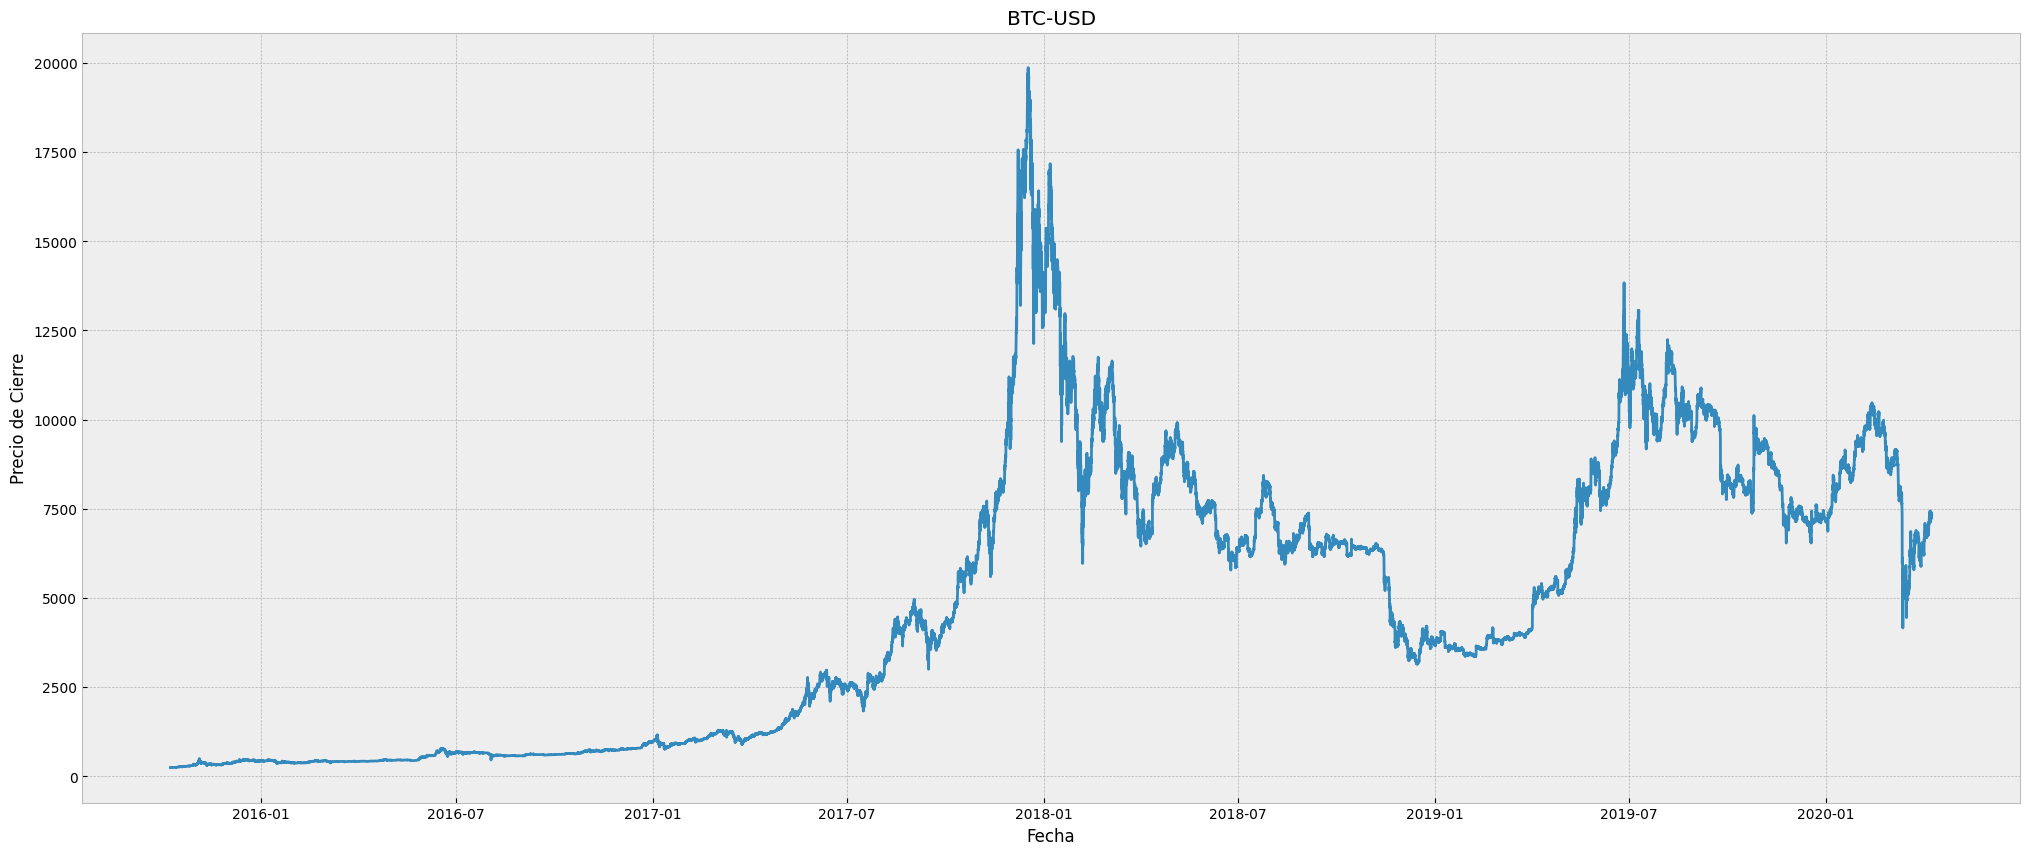

In [ ]:
# Grafico Precio de Cierre vs Tiempo
fig = plt.subplots(figsize=(25, 10))
sns.lineplot(data=df_bitcoin, x="Date", y="Close").set(title='BTC-USD', xlabel='Fecha', ylabel='Precio de Cierre')

In [ ]:
# Una posible medida intuitiva de la volatilidad sería verificar cuánto cambió el precio del activo de acuerdo al precio de cierre y salida

df_bitcoin['Diferencia'] = (df_bitcoin['Close'] - df_bitcoin['Open'])/100
df_bitcoin

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Month,Year,Diferencia
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7338.23,7338.23,7.788915,2020-04,2020,-0.3137
1,1586386800000,2020-04-08 23:00:00,BTCUSD,7367.28,7398.92,7348.47,7369.60,66.558293,2020-04,2020,0.0232
2,1586383200000,2020-04-08 22:00:00,BTCUSD,7337.19,7390.25,7322.87,7367.28,88.486108,2020-04,2020,0.3009
3,1586379600000,2020-04-08 21:00:00,BTCUSD,7327.70,7370.00,7311.33,7337.19,35.551553,2020-04,2020,0.0949
4,1586376000000,2020-04-08 20:00:00,BTCUSD,7320.11,7375.72,7313.66,7327.70,153.655811,2020-04,2020,0.0759
...,...,...,...,...,...,...,...,...,...,...,...
39460,1444323600,2015-10-08 17:00:00,BTCUSD,244.25,244.99,244.02,244.99,3.920632,2015-10,2015,0.0074
39461,1444320000,2015-10-08 16:00:00,BTCUSD,244.92,244.92,244.25,244.25,3.895252,2015-10,2015,-0.0067
39462,1444316400,2015-10-08 15:00:00,BTCUSD,245.00,245.00,244.92,244.92,3.016926,2015-10,2015,-0.0008
39463,1444312800,2015-10-08 14:00:00,BTCUSD,245.00,245.00,244.50,245.00,4.453649,2015-10,2015,0.0000


[Text(0.5, 1.0, 'BTC-USD'), Text(0.5, 0, 'Fecha'), Text(0, 0.5, 'Diferencia')]

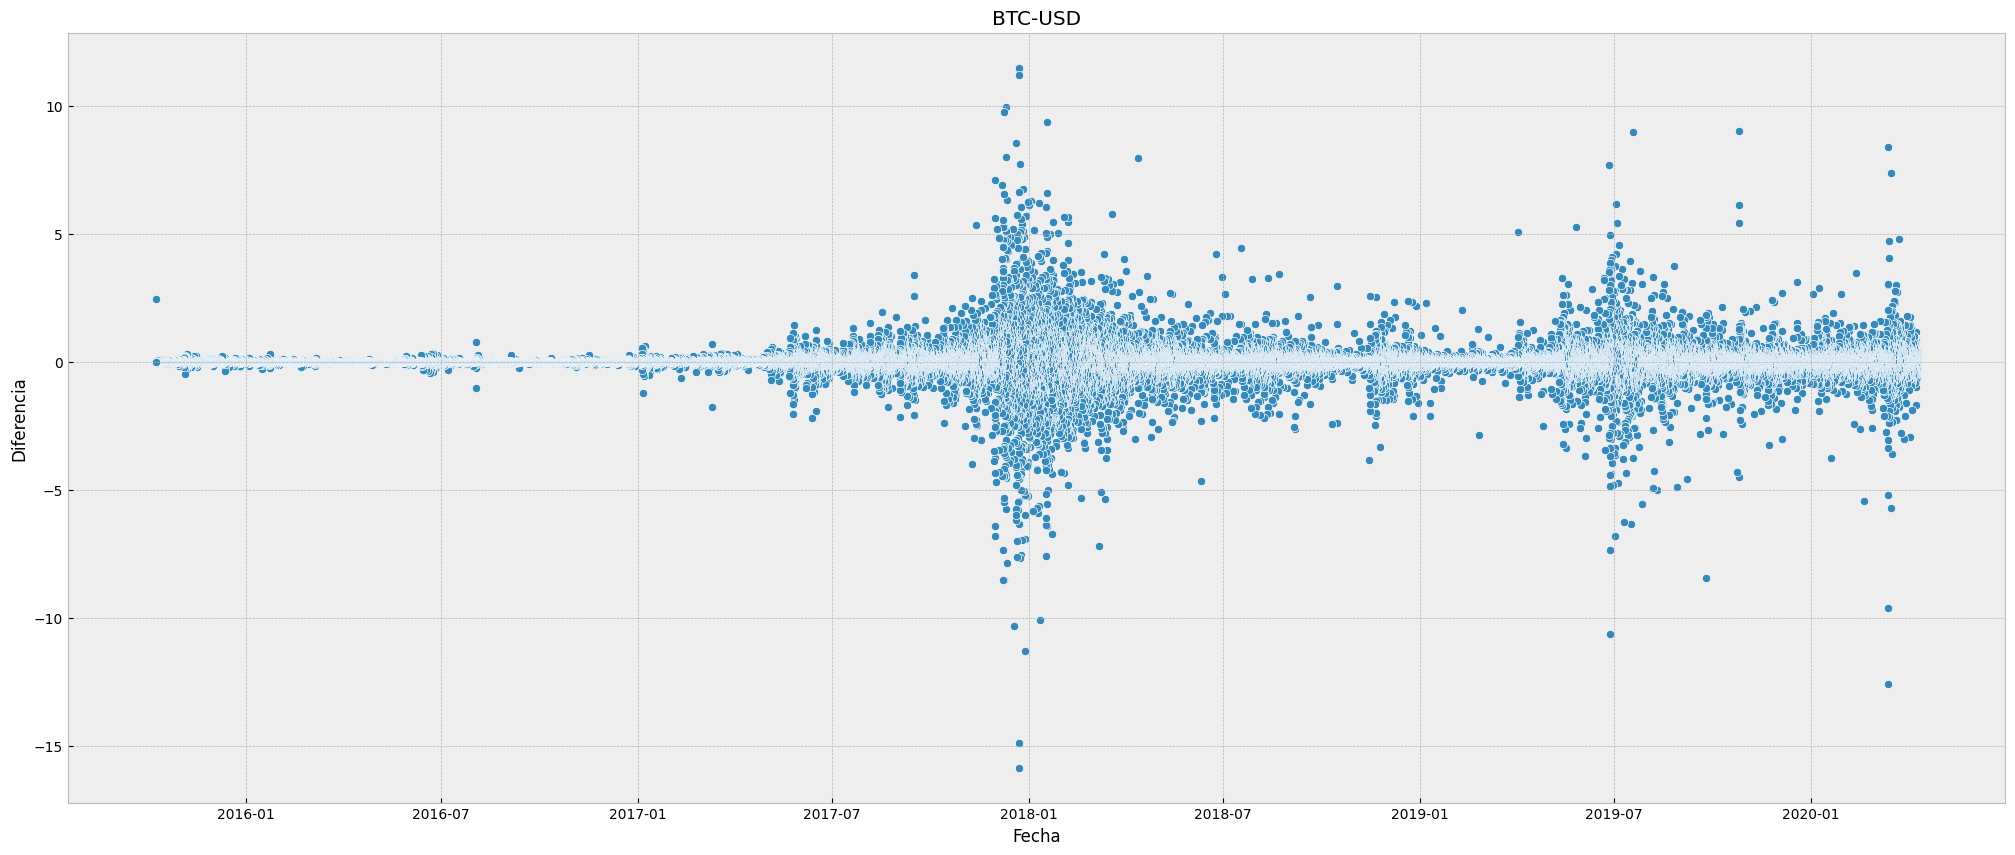

In [ ]:
# Se usa la grafica scatterplot
fig = plt.subplots(figsize=(25, 10))
sns.scatterplot(data=df_bitcoin, x="Date", y="Diferencia").set(title='BTC-USD', xlabel='Fecha', ylabel='Diferencia')